Solving linear equations least squares problem

# Ax = b 

Overdetermined vs. Underdetermined Systems

Overdetermined System (More Equations than Unknowns)
Condition: 

m > n (more rows than columns)

    2x+y = 5
    x−y = 1 
    x+2y = 4    => x , y ?
​

Usually, there is no exact solution because the system is inconsistent (too many constraints).

Underdetermined System (More Unknowns than Equations)

Condition: 

m < n (more columns than rows)

    x + y + z = 1 
    x - y = 2       => x , y, z ?

    This system has infinitely many solutions because there aren't enough constraints.


Compute the Minimal-Norm Solution Using SVD (x_min)

Solve the overdetermined system: Ax=b 




In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define A and b
A = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([7, 8, 9])

print('Matrix A : ')

print(A)

print(f'Vector b : {b}')



Matrix A : 
[[1 2]
 [3 4]
 [5 6]]
Vector b : [7 8 9]


find a least squares solution using SVD 

# A=UΣV^T


Where U and V are orthogonal matrices , Σ is a diagonal matrix.

Compute the pseudoinverse A+ :
𝐴+ = VΣ+U^T
 

Σ+  is the inverse of nonzero singular values.

x = A+ b 

In [25]:
# Compute SVD
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Compute pseudoinverse of Sigma
Sigma_plus = np.diag(1 / S)

# Compute pseudoinverse of A
A_plus = VT.T @ Sigma_plus @ U.T

# Solve for x
x = A_plus @ b

print("Solution x:", x)

Solution x: [-6.   6.5]


What can we do with x ? 

1. Use the fitted line equation to predict new values.
2. Visualize the fitted model along with the new predictions on the graph.

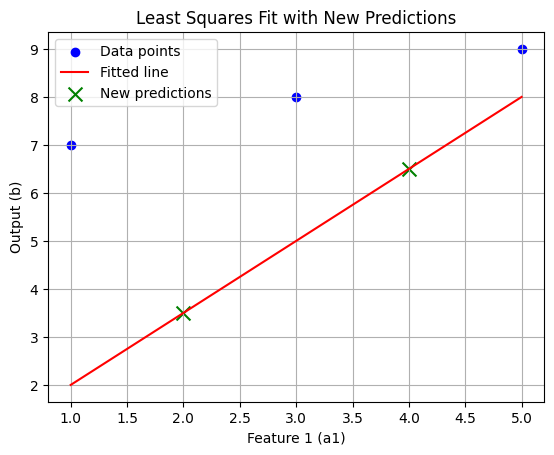

In [19]:


# Fitted coefficients (from SVD)
x = np.array([1.5, 0.5])

# Extract the first column of A as the x-axis values
a1_values = A[:, 0]

# Define the line equation: y = x[0] * a1 + x[1]
a1_range = np.linspace(min(a1_values), max(a1_values), 100)  # Range of a1 values
y_pred = x[0] * a1_range + x[1]  # Compute y values using the line equation

# New input points for prediction
a_new_points = np.array([[2, 1], [4, 1]])  # New inputs
y_new_pred = np.dot(a_new_points, x)  # Predictions for new inputs

# Plot the data points
plt.scatter(a1_values, b, color='blue', label='Data points')

# Plot the fitted line
plt.plot(a1_range, y_pred, color='red', label='Fitted line')

# Plot the new predictions
plt.scatter(a_new_points[:, 0], y_new_pred, color='green', marker='x', s=100, label='New predictions')

# Add labels and legend
plt.xlabel('Feature 1 (a1)')
plt.ylabel('Output (b)')
plt.title('Least Squares Fit with New Predictions')
plt.legend()
plt.grid(True)
plt.show()

Least squares solution: [1.5 0.5]
Residual vector: [ 4.5  1.5 -1.5]
Residual norm (error magnitude): 4.9749371855331


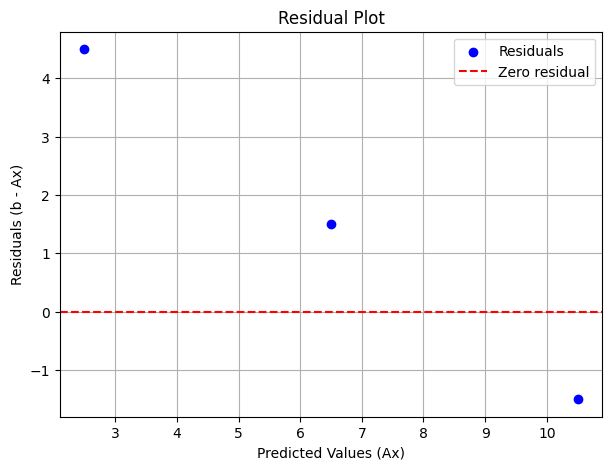

In [24]:
# Compute residuals
residuals = b - A @ x
residual_norm = np.linalg.norm(residuals)
print("Least squares solution:", x)
print("Residual vector:", residuals)
print("Residual norm (error magnitude):", residual_norm)


# Compute predicted values
predicted_values = A @ x

# Plot residuals
plt.figure(figsize=(7, 5))
plt.scatter(predicted_values, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero residual')
plt.xlabel('Predicted Values (Ax)')
plt.ylabel('Residuals (b - Ax)')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()